In [1]:
import pandas as pd

In [5]:
# Column names for the data, c.f. the description for details.
# One important thing to note is that some of the variables
# (e.g. the soil type) are indicator variables. One could have
# a discussion about how sensible it is to use LDA with these,
# but we'll just proceed for educational value.
column_names = (
["Elevation",
"Aspect",
"Slope",
"Horizontal_Distance_To_Hydrology",
"Vertical_Distance_To_Hydrology",
"Horizontal_Distance_To_Roadways",
"Hillshade_9am",
"Hillshade_Noon",
"Hillshade_3pm",
"Horizontal_Distance_To_Fire_Points"]
    + ['WE{}'.format(i) for i in range(4)]
    + ['ST{}'.format(i) for i in range(40)]
    + ['Cover'])

In [3]:
cover_data = pd.read_csv('data/covtype.data.gz', names=column_names)

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
X = cover_data[column_names[:-1]]
y = cover_data.Cover

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
Xtr, Xte, ytr, yte = train_test_split(X,y,test_size=0.3)

In [9]:
sk_model = LinearDiscriminantAnalysis().fit(Xtr, ytr)

In [10]:
sk_hits = sk_model.predict(Xte) == yte

In [11]:
sk_hits.mean()

0.67955984945841752

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
import time

In [14]:
import numpy as np

In [15]:
Xtr.shape

(406708, 54)

In [16]:
deltas = []
NS = np.arange(1e4, 6e4, 1e4)
for N in NS:
    X, y = Xtr[:int(N)], ytr[:int(N)]
    start = time.time()
    lr = LogisticRegression().fit(X, y)
    deltas.append(time.time() - start)

In [19]:
deltas_lda = []
for N in NS:
    X, y = Xtr[:int(N)], ytr[:int(N)]
    start = time.time()
    lr = LinearDiscriminantAnalysis().fit(X, y)
    deltas_lda.append(time.time() - start)

/Users/dirk/Virtualenvs/std/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

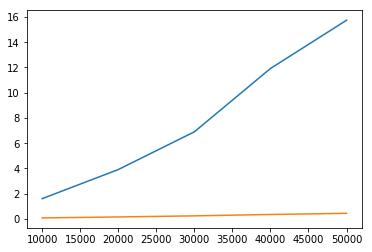

In [20]:
plt.plot(NS, deltas)
plt.plot(NS, deltas_lda)

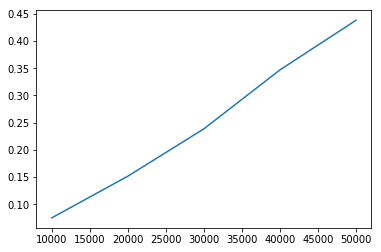

In [21]:
plt.plot(NS, deltas_lda)

In [23]:
from statsmodels.discrete.discrete_model import Logit

In [40]:
X, y = Xtr[Xtr.columns[:10]][:50000].copy(), (ytr[:50000] == 2) + 0.0

In [44]:
X['const'] = 1

In [45]:
model = Logit(y, X)

In [46]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.653371
         Iterations 5


In [47]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Cover   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49989
Method:                           MLE   Df Model:                           10
Date:                Mon, 13 Mar 2017   Pseudo R-squ.:                 0.05677
Time:                        10:55:16   Log-Likelihood:                -32669.
converged:                       True   LL-Null:                       -34635.
                                        LLR p-value:                     0.000
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Elevation                             -0.0019   3.98e-05    -47.083      0.000      -0.002      -0.002
Aspect                                -0.0006      0.000     -5.544      0.000      -0.001      -0.000
Slope                                  0.0044      0.003      1.334      0.182      -0.002       0.011
Horizontal_Distance_To_Hydrology       0.0013   5.97e-05     20.949      0.000       0.001       0.001
Vertical_Distance_To_Hydrology        -0.0010      0.000     -4.418      0.000      -0.001      -0.001
Horizontal_Distance_To_Roadways     8.272e-05   6.83e-06     12.106      0.000    6.93e-05    9.61e-05
Hillshade_9am                          0.0090      0.004      2.488      0.013       0.002       0.016
Hillshade_Noon                         0.0103      0.003      3.479      0.001       0.004       0.016
Hillshade_3pm                          0.0043      0.003      1.441      0.149      -0.002       0.010
Horizontal_Distance_To_Fire_Points     0.0002   7.88e-06     26.738      0.000       0.000       0.000
const                                 -0.2005      0.612     -0.328      0.743      -1.399       0.998
======================================================================================================
"""

In [48]:
np.exp(0.0103)

1.0103532275910965

# Spark

In [1]:
sc

In [3]:
sc.parallelize(['a', 1.2, [], ('foo', 1)]).collect()

['a', 1.2, [], ('foo', 1)]

In [4]:
spark

In [6]:
rawRDD = sc.textFile('data/covtype.data.gz')

In [8]:
rawRDD.take(5)

[u'2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5',
 u'2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5',
 u'2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2',
 u'2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2',
 u'2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5']

In [9]:
from pyspark.sql import Row

In [10]:
Row(name='Kirk', rank=5)

Row(name='Kirk', rank=5)

In [11]:
Row(**{'name': 'Kirk', 'rank':5})

Row(name='Kirk', rank=5)

In [13]:
cover = spark.createDataFrame(
    rawRDD
    .map(lambda x: [float(i) for i in x.split(',')])
    .map(lambda x: Row(**{name: value for name, value in zip(column_names, x)}))
)

In [14]:
cover

DataFrame[Aspect: double, Cover: double, Elevation: double, Hillshade_3pm: double, Hillshade_9am: double, Hillshade_Noon: double, Horizontal_Distance_To_Fire_Points: double, Horizontal_Distance_To_Hydrology: double, Horizontal_Distance_To_Roadways: double, ST0: double, ST1: double, ST10: double, ST11: double, ST12: double, ST13: double, ST14: double, ST15: double, ST16: double, ST17: double, ST18: double, ST19: double, ST2: double, ST20: double, ST21: double, ST22: double, ST23: double, ST24: double, ST25: double, ST26: double, ST27: double, ST28: double, ST29: double, ST3: double, ST30: double, ST31: double, ST32: double, ST33: double, ST34: double, ST35: double, ST36: double, ST37: double, ST38: double, ST39: double, ST4: double, ST5: double, ST6: double, ST7: double, ST8: double, ST9: double, Slope: double, Vertical_Distance_To_Hydrology: double, WE0: double, WE1: double, WE2: double, WE3: double]

In [15]:
cover.printSchema()

root
 |-- Aspect: double (nullable = true)
 |-- Cover: double (nullable = true)
 |-- Elevation: double (nullable = true)
 |-- Hillshade_3pm: double (nullable = true)
 |-- Hillshade_9am: double (nullable = true)
 |-- Hillshade_Noon: double (nullable = true)
 |-- Horizontal_Distance_To_Fire_Points: double (nullable = true)
 |-- Horizontal_Distance_To_Hydrology: double (nullable = true)
 |-- Horizontal_Distance_To_Roadways: double (nullable = true)
 |-- ST0: double (nullable = true)
 |-- ST1: double (nullable = true)
 |-- ST10: double (nullable = true)
 |-- ST11: double (nullable = true)
 |-- ST12: double (nullable = true)
 |-- ST13: double (nullable = true)
 |-- ST14: double (nullable = true)
 |-- ST15: double (nullable = true)
 |-- ST16: double (nullable = true)
 |-- ST17: double (nullable = true)
 |-- ST18: double (nullable = true)
 |-- ST19: double (nullable = true)
 |-- ST2: double (nullable = true)
 |-- ST20: double (nullable = true)
 |-- ST21: double (nullable = true)
 |-- ST22: do

In [16]:
cover['elevation', 'aspect', 'slope'].show(5)

+---------+------+-----+
|elevation|aspect|slope|
+---------+------+-----+
|   2596.0|  51.0|  3.0|
|   2590.0|  56.0|  2.0|
|   2804.0| 139.0|  9.0|
|   2785.0| 155.0| 18.0|
|   2595.0|  45.0|  2.0|
+---------+------+-----+
only showing top 5 rows



In [17]:
cover['elevation']

Column<elevation>

In [21]:
cover.Elevation

Column<Elevation>

In [22]:
cover.select(cover.Elevation, cover.Slope).show(5)

+---------+-----+
|Elevation|Slope|
+---------+-----+
|   2596.0|  3.0|
|   2590.0|  2.0|
|   2804.0|  9.0|
|   2785.0| 18.0|
|   2595.0|  2.0|
+---------+-----+
only showing top 5 rows



In [23]:
cover.select(cover.Elevation, cover.Slope/10).show(5)

+---------+------------+
|Elevation|(Slope / 10)|
+---------+------------+
|   2596.0|         0.3|
|   2590.0|         0.2|
|   2804.0|         0.9|
|   2785.0|         1.8|
|   2595.0|         0.2|
+---------+------------+
only showing top 5 rows



In [26]:
(cover
 .filter(cover.Slope > 10)
 .select(cover.Elevation)
 .show(5))

+---------+
|Elevation|
+---------+
|   2785.0|
|   2886.0|
|   2742.0|
|   2880.0|
|   2768.0|
+---------+
only showing top 5 rows



In [27]:
d = cover.sample(True, 0.05)

In [28]:
d.cache()

DataFrame[Aspect: double, Cover: double, Elevation: double, Hillshade_3pm: double, Hillshade_9am: double, Hillshade_Noon: double, Horizontal_Distance_To_Fire_Points: double, Horizontal_Distance_To_Hydrology: double, Horizontal_Distance_To_Roadways: double, ST0: double, ST1: double, ST10: double, ST11: double, ST12: double, ST13: double, ST14: double, ST15: double, ST16: double, ST17: double, ST18: double, ST19: double, ST2: double, ST20: double, ST21: double, ST22: double, ST23: double, ST24: double, ST25: double, ST26: double, ST27: double, ST28: double, ST29: double, ST3: double, ST30: double, ST31: double, ST32: double, ST33: double, ST34: double, ST35: double, ST36: double, ST37: double, ST38: double, ST39: double, ST4: double, ST5: double, ST6: double, ST7: double, ST8: double, ST9: double, Slope: double, Vertical_Distance_To_Hydrology: double, WE0: double, WE1: double, WE2: double, WE3: double]

In [29]:
d.groupBy('Cover').agg({'Slope': 'avg'}).show()

+-----+------------------+
|Cover|        avg(Slope)|
+-----+------------------+
|  7.0|14.408221797323137|
|  1.0|13.146202711671565|
|  4.0| 18.65972222222222|
|  3.0|20.850795392210642|
|  2.0|13.514805084144003|
|  6.0| 19.14864864864865|
|  5.0|17.290249433106577|
+-----+------------------+



In [31]:
d.groupBy('Cover').agg({'slope': 'avg', 'aspect': 'max'}).show()

+-----+-----------+----------+
|Cover|max(aspect)|min(slope)|
+-----+-----------+----------+
|  7.0|      359.0|       1.0|
|  1.0|      359.0|       0.0|
|  4.0|      351.0|       2.0|
|  3.0|      360.0|       1.0|
|  2.0|      360.0|       0.0|
|  6.0|      359.0|       1.0|
|  5.0|      359.0|       0.0|
+-----+-----------+----------+



In [32]:
d.groupBy('Cover').agg({'slope': 'avg', 'aspect': 'max'}).toPandas()

,Cover,max(aspect),avg(slope)
0,7.0,359.0,14.408222
1,1.0,359.0,13.146203
2,4.0,351.0,18.659722
3,3.0,360.0,20.850795
4,2.0,360.0,13.514805
5,6.0,359.0,19.148649
6,5.0,359.0,17.290249


In [34]:
d.groupBy('Cover').agg({'slope': 'avg', 'aspect': 'max'}).toJSON().collect()

[u'{"Cover":7.0,"max(aspect)":359.0,"avg(slope)":14.408221797323137}',
 u'{"Cover":1.0,"max(aspect)":359.0,"avg(slope)":13.146202711671565}',
 u'{"Cover":4.0,"max(aspect)":351.0,"avg(slope)":18.65972222222222}',
 u'{"Cover":3.0,"max(aspect)":360.0,"avg(slope)":20.850795392210642}',
 u'{"Cover":2.0,"max(aspect)":360.0,"avg(slope)":13.514805084144003}',
 u'{"Cover":6.0,"max(aspect)":359.0,"avg(slope)":19.14864864864865}',
 u'{"Cover":5.0,"max(aspect)":359.0,"avg(slope)":17.290249433106577}']

In [36]:
d.cov('Slope', 'Elevation')

-523.0451897526334

In [37]:
d.corr('Slope', 'Elevation')

-0.2503905729540995

In [38]:
d.describe('Slope').show()

+-------+------------------+
|summary|             Slope|
+-------+------------------+
|  count|             28972|
|   mean|14.130194670716554|
| stddev| 7.452001219402018|
|    min|               0.0|
|    max|              61.0|
+-------+------------------+



In [39]:
dna = spark.createDataFrame(
    sc.parallelize([Row(name="john", age=None),
                    Row(name=None, age=99)])
)

In [41]:
dna.show()

+----+----+
| age|name|
+----+----+
|null|john|
|  99|null|
+----+----+



In [42]:
dna.dropna().show()

+---+----+
|age|name|
+---+----+
+---+----+



In [44]:
dna.na.fill({'name': 'unkown', 'age': -99}).show()

+---+------+
|age|  name|
+---+------+
|-99|  john|
| 99|unkown|
+---+------+



In [45]:
from pyspark.sql import functions as fn

In [48]:
d.agg(fn.approxCountDistinct(d.Slope).alias('something')).show()

+---------+
|something|
+---------+
|       48|
+---------+



In [49]:
from pyspark.ml.classification import LogisticRegression

In [50]:
from pyspark.ml.feature import VectorAssembler

In [52]:
feature_maker = VectorAssembler(inputCols=column_names[:-1], outputCol='features')

In [53]:
data = feature_maker.transform(cover)

In [57]:
data.select(data.features, data.Slope, data.Cover).show(5)

+--------------------+-----+-----+
|            features|Slope|Cover|
+--------------------+-----+-----+
|(54,[0,1,2,3,5,6,...|  3.0|  5.0|
|(54,[0,1,2,3,4,5,...|  2.0|  5.0|
|(54,[0,1,2,3,4,5,...|  9.0|  2.0|
|(54,[0,1,2,3,4,5,...| 18.0|  2.0|
|(54,[0,1,2,3,4,5,...|  2.0|  5.0|
+--------------------+-----+-----+
only showing top 5 rows



In [56]:
train, test = data.randomSplit([0.7, 0.3])

In [58]:
model = LogisticRegression(labelCol='Cover').fit(train)

In [59]:
coefs = model.coefficientMatrix.toArray()

In [61]:
coefs.shape

(8, 54)

In [62]:
result = model.evaluate(test.sample(False, 0.05))

In [64]:
result

In [66]:
result.predictions.select((result.predictions.Cover == result.predictions.prediction)
                          .cast('float')
                         .alias('hit')).groupBy().avg('hit').collect()

[Row(avg(hit)=0.7086649478757987)]

In [69]:
import numpy as np

In [71]:
for name, c in zip(column_names, coefs[2,:]):
    print name, np.exp(c)

Elevation 0.998739748413
Aspect 0.998182311193
Slope 1.02920048515
Horizontal_Distance_To_Hydrology 1.00208448584
Vertical_Distance_To_Hydrology 0.998001498166
Horizontal_Distance_To_Roadways 1.00030684315
Hillshade_9am 1.02035298941
Hillshade_Noon 0.984295792007
Hillshade_3pm 1.0271114252
Horizontal_Distance_To_Fire_Points 1.0001157526
WE0 6.13674205711
WE1 11.4434102778
WE2 0.824356857213
WE3 0.155403612971
ST0 0.00518709308815
ST1 0.179522099546
ST2 1.28841677742
ST3 0.159033823322
ST4 0.00614101704753
ST5 0.981202195547
ST6 137.625303867
ST7 5.46674578273
ST8 5.73466556291
ST9 0.590531743108
ST10 0.863037455641
ST11 7.82342394636
ST12 2.98653763648
ST13 0.000357413052072
ST14 0.0232091350345
ST15 0.30166210055
ST16 0.17585337187
ST17 1.19147513859
ST18 2.10281120579
ST19 1.97626422507
ST20 0.586171600041
ST21 4.1156065864
ST22 1.85514385024
ST23 2.89629321994
ST24 20.3524799919
ST25 6.73890141643
ST26 6.30867092648
ST27 6.71003985812
ST28 1.47701839421
ST29 1.17018664863
ST30 3.340